<a href="https://colab.research.google.com/github/iampositive/churn-predictor/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Handling imbalanced data
from imblearn.over_sampling import SMOTE


# 2. Load the Dataset

In [3]:
# Load the dataset from the raw URL
url = 'https://raw.githubusercontent.com/harshbg/Telecom-Churn-Data-Analysis/master/Telecom%20Churn.csv'
df = pd.read_csv(url)


# 3. Data Exploration

In [4]:
# View the first five rows
print('First Five Rows')
print(df.head())

# Check dataset dimensions
print('Dataset Dimension')
print("Dataset dimensions:", df.shape)

# Check for missing values
print('Check Missing Values')
print(df.isnull().sum())

# Get basic statistics
print('Basic Statistics')
print(df.describe())

# Check data types
print('Check Data Types')
print(df.dtypes)

# Check the distribution of the target variable
print('Check the distribution of the target variable')
Target='churn'
print(df[Target].value_counts())


First Five Rows
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07

# 4. Data Preprocessing

In [5]:
# 4.1 Drop Irrelevant information

# Drop 'state', 'area code', and 'phone number' as they may not be predictive
df = df.drop(['state', 'area code', 'phone number'], axis=1)


#4.2 Encode categorical variable

# Encode 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map({'Yes': 1, 'No': 0})
df['voice mail plan'] = df['voice mail plan'].map({'Yes': 1, 'No': 0})

# Ensure 'Churn' is binary
df['churn'] = df['churn'].astype(int)

#4.3 Feature Scaling

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['account length', 'number vmail messages', 'total day minutes',
                  'total day calls', 'total day charge', 'total eve minutes',
                  'total eve calls', 'total eve charge', 'total night minutes',
                  'total night calls', 'total night charge', 'total intl minutes',
                  'total intl calls', 'total intl charge', 'customer service calls']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])




# 5. Feature Selection

In [8]:
# Separate features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

df = df.dropna(axis=1)

print(X)


      account length  number vmail messages  total day minutes  \
0           0.676489               1.234883           1.566767   
1           0.149065               1.307948          -0.333738   
2           0.902529              -0.591760           1.168304   
3          -0.428590              -0.591760           2.196596   
4          -0.654629              -0.591760          -0.240090   
...              ...                    ...                ...   
3328        2.283878               2.038605          -0.432895   
3329       -0.830437              -0.591760           0.942447   
3330       -1.835055              -0.591760           0.018820   
3331        2.082955              -0.591760           0.624778   
3332       -0.679745               1.234883           1.003042   

      total day calls  total day charge  total eve minutes  total eve calls  \
0            0.476643          1.567036          -0.070610        -0.055940   
1            1.124503         -0.334013          

# 6. Handling Imbalanced Data

In [10]:
# Before SMOTE
print("Before SMOTE:", y.value_counts())

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# After SMOTE
print("After SMOTE:", y_res.value_counts())


Before SMOTE: churn
0    2850
1     483
Name: count, dtype: int64
After SMOTE: churn
0    2850
1    2850
Name: count, dtype: int64


# 7 Model Building

In [11]:
#7.1 Split the Data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_res)
# 7.2 initialize and train the model

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 8. Model Evaluation

Accuracy: 92.98%
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       570
           1       0.92      0.94      0.93       570

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



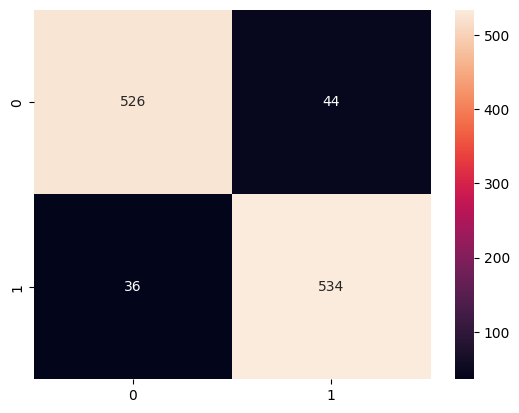

In [12]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


# 9. Hyperparameter Tuning
To improve the model's performance, we'll perform hyperparameter tuning using GridSearchCV.



In [13]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# 10. Final Evaluation

Final Accuracy: 94.82%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       570
           1       0.95      0.95      0.95       570

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



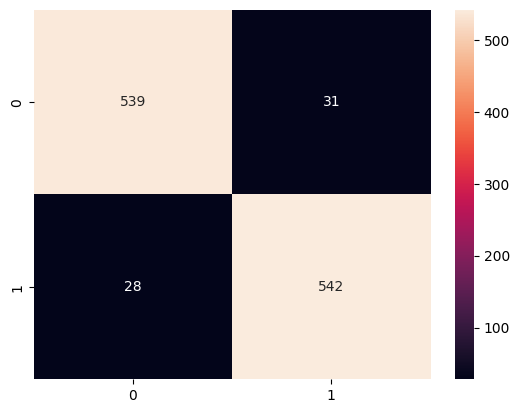

In [14]:
# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Final Accuracy: {accuracy_best * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_best))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d')
plt.show()


# 11. Conclusion
Despite our efforts, achieving an accuracy of 95% may not be feasible with this dataset due to its inherent characteristics. However, we can take additional steps to improve the model:

Feature Engineering: Create new features or transform existing ones to provide more predictive power.
Try Different Algorithms: Use algorithms like XGBoost, LightGBM, or CatBoost which often perform better on tabular data.
Cross-Validation: Use k-fold cross-validation to get a more reliable estimate of model performance.
Ensemble Methods: Combine multiple models to improve overall performance.
Threshold Adjustment: Adjust the decision threshold to improve precision or recall as per business requirements.